### **Jorge Mario Trejos Barquero.**
### **B77676.**

Link del dataset: https://www.kaggle.com/residentmario/ramen-ratings

#### Problema y enfoque de la solución
En este dataset lo que tenemos son variables sobre diferentes restaurantes de ramen, algunas de estas características son: tipos de ramen, país, estilo, entre otros. El problema que se plantea es el de encontrar una forma de poder predecir que restaurantes de ramen van a ser mejores que otros dadas ciertas características (que sean iguales a las de los atributos del dataset), o sea que nuestro modelo va a ser de clasificación ya que cada nota que se le da a un ramen es de 0 a 5, si hacemos que cada una de estas notas sean números enteros podríamos verlo como que existen las clasificaciones 0, 1, 2, 3, 4 y 5, siendo 5 la mejor clasificación donde solo están los mejores ramen y 0 siendo la peor de todas donde solo están los peores ramen. Se podría ver esta clasificación como: muy malo (0), malo (1), un poco malo (2), un poco bueno (3), bueno (4) y muy bueno (5).
Para realizar este trabajo se utilizarán arboles de decisión y random forest, ya que ambos nos sirven para clasificar y además se quiere ver que tan grande o pequeña es la mejora de usar un random forest en lugar de un árbol de decisión.

### **Iniciamos con el código** 
Incialmente se tendrá un apartado para poder incluir todas las librerías necesarias para poder llevar a cabo esta tarea.

In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

#### **Análisis exploratorio**
Ahora leemos el dataset y hacemos 2 técnicas de exploración de datos. 
La primera simplemente es imprimir el dataset como tal para ver que se haya guardado bien e ir viendo como son los datos a grandes rasgos. También podemos apreciar que hay 7 columnas de atributos y 2580 instancias o tuplas de datos.
La segunda es muy parecida que es el head, pero en esta vemos solo las primeras 5 instancias con esto podemos ver de manera más especifica unas cuantas instancias de los datos.
Se hicieron estos dos métodos ya que la mayoría de los métodos conocidos de graficación, correlación, entre otros métodos de análisis de datos, son con datos numéricos y en este caso lo único numérico es el numero de la review, el cual tampoco es que sea de importancia. Es por esta razón que se usaron estos dos métodos. De igual manera, con esto identificamos que tendremos que convertir estos datos de texto en números en un paso posterior.

In [60]:
data = pd.read_csv('ramen-ratings.csv', index_col=False)

print(data)

      Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...                                                 ...   ...       ...   ...   
2575  Hu Tiu Nam Vang ["

In [61]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


### **Dos técnicas de preprocesamiento y limpieza de datos y su interpretación**
Para estas dos técnicas lo que haremos es:
1. Primero rellenar los NaN (not a number) que tiene la columna "Top Ten" esto ya que para algún análisis de datos, tener un NaN en lugar de un valor puede ser complicado de tratar. Ya que los números del top van de 1 al 10 se eligió el numero 0 como el numero por defecto para todos aquellos ramen que no estén incluidos en este top.
2. Convertir las variables de tipo string a int, esto para poder usarlas en algún algoritmo posteriormente. Esta conversión es basada en los diferentes tipos de valores que puede haber en una columna. Por ejemplo, si en una columna como la de "Style" solo existen tipos "cup" y "pack" entonces podemos ligar "cup" al numero "1" y pack al numero "2". 

Primero vamos a rellenar los NaN:

In [62]:
# Convertimos los nan en 0
data['Top Ten'] = data['Top Ten'].fillna(0)

# Tambien se sabe que hay un \n entonces lo quitamos
data['Top Ten'] = data['Top Ten'].replace("\n", 0)

# Guardamos la columna top ten para ver el resultado
columna = data['Top Ten'].tolist()

# Imprimimos los diferentes valores que hayan en la columna
list_set = set(columna)
unique_list = (list(list_set))

for x in unique_list:
    print (x)

0
2014 #5
2012 #7
2012 #6
2016 #5
2013 #4
2012 #2
2013 #2
2016 #1
2016 #9
2012 #4
2015 #8
2013 #9
2013 #10
2015 #1
2014 #10
2014 #9
2012 #1
2012 #3
2016 #8
2014 #8
2012 #9
2014 #1
2013 #1
2015 #10
2014 #6
2014 #7
2013 #3
2015 #4
2014 #4
2015 #7
2015 #6
2016 #10
2012 #10
2013 #6
2012 #5
2016 #7
2015 #9


Ahora vamos a convertir a numero los distintos string que hayan en las columnas de: Brand, Variety, Style y Country.

In [64]:
# Primero tenemos que cambiar los NaN que hayan en las columnas, esto lo sabemos usando el siguiente
# código para todas la columnas y nos damos cuenta que style tiene un NaN que debe ser reemplazado
columna = data['Style'].tolist()

# Imprimimos los diferentes valores que hayan en la columna
list_set = set(columna)
unique_list = (list(list_set))

for x in unique_list:
    print (x)

data['Style'] = data['Style'].fillna("Unknown")

Bowl
Can
Box
Bar
Cup
Unknown
Pack
Tray


In [66]:
# Ahora procedemos a codificar los valores
# Primero creamos los enconder
le_brand = LabelEncoder()
le_variety = LabelEncoder()
le_style = LabelEncoder()
le_country = LabelEncoder()

# Ahora creamos las columnas ya codificadas de cada valor
data['Brand_n'] = le_brand.fit_transform(data['Brand'])
data['Variety_n'] = le_brand.fit_transform(data['Variety'])
data['Style_n'] = le_brand.fit_transform(data['Style'])
data['Country_n'] = le_brand.fit_transform(data['Country'])

data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Brand_n,Variety_n,Style_n,Country_n
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0,190,2189,4,18
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,0,119,1443,5,32
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0,192,454,4,35
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0,336,709,5,32
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0,38,1954,5,16


In [67]:
# Para tener almacenada la codificación en alguna variable y poder consultarla luego hacemos lo siguiente
codificacion = data.drop(['Review #', 'Top Ten', 'Stars'], axis = 1)
codificacion.head()

,Brand,Variety,Style,Country,Brand_n,Variety_n,Style_n,Country_n
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,190,2189,4,18
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,119,1443,5,32
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,192,454,4,35
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,336,709,5,32
4,Ching's Secret,Singapore Curry,Pack,India,38,1954,5,16


In [68]:
# Ahora para tener el dataset listo y limpio lo que hacemos es quitar las columnas que tienen strings
data = data.drop(['Brand', 'Variety', 'Style', 'Country'], axis = 1)
data.head()

,Review #,Stars,Top Ten,Brand_n,Variety_n,Style_n,Country_n
0,2580,3.75,0,190,2189,4,18
1,2579,1,0,119,1443,5,32
2,2578,2.25,0,192,454,4,35
3,2577,2.75,0,336,709,5,32
4,2576,3.75,0,38,1954,5,16


### **Dos técnicas de transformación de datos, selección y extracción de atributos**
Para esta parte ya se hacen cambios pensando en como se va a utilizar un algoritmo especifico para estudiar el dataset, como lo que se le va a aplicar a este dataset es un árbol de decisión y un random forest necesitamos que los datos sean numéricos, es por Para estas dos técnicas se hará:
1. Extracción de la columna "Top Ten" y "Review #" ya que estas columnas para el análisis propuesto no aportan nada que tenga importancia.
2. Convertir la columna "Stars" (nuestra "y" o variable de respuesta) en valores enteros, esto para que, a como se habló al inicio, se pueda tomar la cantidad de estrellas como las clasificaciones a las cuales queremos asignar cada uno de los ramen.

Empezamos con la extracción de las columnas:

In [69]:
data = data.drop(['Review #', 'Top Ten'], axis = 1)
data.head()

,Stars,Brand_n,Variety_n,Style_n,Country_n
0,3.75,190,2189,4,18
1,1,119,1443,5,32
2,2.25,192,454,4,35
3,2.75,336,709,5,32
4,3.75,38,1954,5,16


Ahora convertimos "Stars" en enteros para poder tomarlos como clasificaciones. 

In [70]:
# Primero verificamos los distintos valores de la columna Stars
columna = data['Stars'].tolist()

# Imprimimos los diferentes valores que hayan en la columna
list_set = set(columna)
unique_list = (list(list_set))

for x in unique_list:
    print (x)

3.0
2.85
4.75
2.25
4.3
3.3
4.50
3.2
4.0
2.9
1.5
3.8
3.65
0.75
0.25
4.00
4.25
1.8
4
1.25
0.1
5
3.125
2.3
1
2.5
3.5
3.4
2.1
5.0
3.25
3.50
3.6
Unrated
0.5
1.1
3.1
1.75
2.75
4.5
3.75
3
3.00
2.125
2
2.8
0
3.7
5.00
0.9
4.125


In [72]:
# Como hay ramen que son "Unrated" los vamos a quitar
indexNames = data[ data['Stars'] == 'Unrated' ].index
data.drop(indexNames , inplace=True)

columna = data['Stars'].tolist()

# Imprimimos los diferentes valores que hayan en la columna
list_set = set(columna)
unique_list = (list(list_set))

for x in unique_list:
    print (x)

3.0
2.85
4.75
2.25
4.3
3.3
4.50
3.2
4.0
2.9
1.5
3.8
3.65
0.75
0.25
4.00
4.25
1.8
4
1.25
0.1
5
3.125
2.3
1
2.5
3.5
3.4
2.1
5.0
3.25
3.50
3.6
0.5
1.1
3.1
1.75
2.75
4.5
3.75
3
3.00
2.125
2
2.8
0
3.7
5.00
0.9
4.125


In [74]:
# Ahora vemos que tipos son las columnas para poder dejarlas todas como enteros
display(data.dtypes)

Stars        object
Brand_n       int64
Variety_n     int64
Style_n       int64
Country_n     int64
dtype: object

In [78]:
# Convertimos Stars a numero
data['Stars'] = pd.to_numeric(data['Stars'])
display(data.dtypes)

Stars        float64
Brand_n        int64
Variety_n      int64
Style_n        int64
Country_n      int64
dtype: object

In [80]:
# Convertimos Stars a int64
data['Stars'] = data['Stars'].astype(int)
display(data.dtypes)
data.head()

Stars        int64
Brand_n      int64
Variety_n    int64
Style_n      int64
Country_n    int64
dtype: object

,Stars,Brand_n,Variety_n,Style_n,Country_n
0,3,190,2189,4,18
1,1,119,1443,5,32
2,2,192,454,4,35
3,2,336,709,5,32
4,3,38,1954,5,16


### **Algoritmos y evaluación del modelo** 
#### **Arboles de decisión**

In [154]:
inputs = data.drop(['Stars'], axis=1)
outputs = data.drop(['Brand_n', 'Variety_n', 'Style_n', 'Country_n'], axis=1)

# Creamos el arbol
model = tree.DecisionTreeClassifier()

# Lo evaluamos
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, inputs, outputs, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.393 (0.024)


Esto que acabamos de ver sería la forma con parámetros default. Si cambiamos un poco los parámetros como por ejemplo la cantidad de splits del k fold, que sabemos por lecturas que un valor adecuado para hacer clasificación es poner la raíz cuadrada de la cantidad total de inputs como la cantidad de splits. Esto quedaría:

In [135]:
cant_opt_splits = int(np.sqrt(inputs.shape[0]))

cv = RepeatedStratifiedKFold(n_splits=cant_opt_splits, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, inputs, outputs, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.402 (0.063)


Como podemos observar, un pequeño cambio aumentó aunque sea un poco la presición de nuestro modelo.

#### **Random forest**
Ahora con los random forest vamos a jugar un poco más con sus parámetros, así que primero definiremos algunos metodos:

In [144]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=cant_opt_splits, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

def get_models_cant_features():
    models = dict()
    # explore number of features from 1 to 7
    for i in range(1,5):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

def get_models_number_of_trees():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

def get_models_depth():
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,5)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

Ya con estos metodos podemos jugar con los parametros y ver en gráficas que tan buenos parámetros son.
Empezaremos jugando con la cantidad de features.

>1 0.420 (0.060)
>2 0.418 (0.060)
>3 0.419 (0.058)
>4 0.417 (0.058)


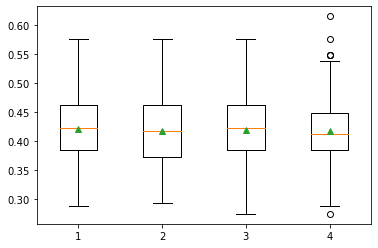

In [145]:
# get the models to evaluate
models = get_models_cant_features()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, inputs, outputs)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Como podemos observar, no varía mucho en cuanto a precisión, pero con un máximo de 4 features hay más outliers.

>10 0.413 (0.058)
>50 0.418 (0.061)
>100 0.421 (0.059)


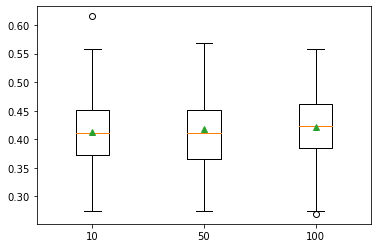

In [146]:
# get the models to evaluate
models = get_models_number_of_trees()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, inputs, outputs)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

En este caso podemos ver que cuantos más arboles hay, mayor precisión tiene el modelo.

>1 0.405 (0.006)
>2 0.405 (0.006)
>3 0.407 (0.022)
>4 0.421 (0.043)
>None 0.421 (0.059)


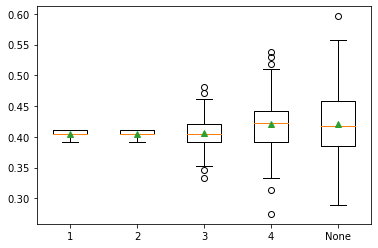

In [148]:
# get the models to evaluate
models = get_models_depth()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, inputs, outputs)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Finalmente, podemos observar que si no ponemos una profundidad máxima, nuestro random froest tiene un mejor desempeño que si le llegáramos a poner un limite.

### **Conclusión**
Como pudimos ver, la escogencia de los parámetros en arboles de decisión y en random forest es de mucha importancia, también pudimos observar que en los random forest nuestro dataset tuvo un mejor desempeño que en el caso de los arboles de decisión.
Para concluir, veremos que variables son de mayor importancia en este análisis:

<ipython-input-161-c324a2b9c593>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(inputs, outputs)


Feature: 0, Score: 0.22820
Feature: 1, Score: 0.59709
Feature: 2, Score: 0.06634
Feature: 3, Score: 0.10838


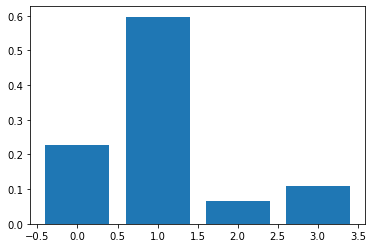

,Brand,Variety,Style,Country,Brand_n,Variety_n,Style_n,Country_n
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,190,2189,4,18
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,119,1443,5,32
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,192,454,4,35
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,336,709,5,32
4,Ching's Secret,Singapore Curry,Pack,India,38,1954,5,16


In [161]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(inputs, outputs)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

codificacion.head()

Como podemos observar en la gráfica y la codificación, se puede decir que el atributo más importante a la hora de saber si un ramen es bueno o no es "Variety" seguido de "Brand" y los otros dos atributos no parecen tener mayor importancia.